### NaN checks

In [1]:
import pandas as pd

df = pd.read_csv('/home/logs/jtorresb/yeastformer/yeast/yeast_data/output/yeast_master_matrix_sgd.csv', sep='\t', index_col=0, header=0)

In [2]:
nan_counts = df.isna().sum(axis=1)  # Count NaNs in each row
nan_counts = nan_counts[nan_counts > 0]  # Filter rows with at least one NaN

### Median Check HS vs TF

#### Boxplot

/tmp/ipykernel_3556010/3252309844.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Category", y="Normalization Factor", data=df, palette=["#4878d0", "#e07b39", "#6aaf48"])


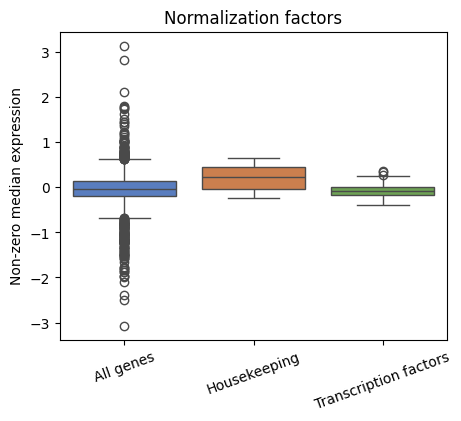

In [3]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Load normalization factors (dictionary: {gene_id: normalization_factor})
with open("/home/logs/jtorresb/yeastformer/yeast/yeast_data/output/yeast_median_dict.pkl", "rb") as f:
    normalization_factors = pickle.load(f)

# Load housekeeping gene IDs
with open("/home/logs/jtorresb/yeastformer/yeast/yeast_data/genes_info/hk_genes.pkl", "rb") as f:
    housekeeping_genes = pickle.load(f)

# Load transcription factor IDs
with open("/home/logs/jtorresb/yeastformer/yeast/yeast_data/genes_info/tf_genes.pkl", "rb") as f:
    transcription_factors = pickle.load(f)

# Extract normalization values for each group
all_values = list(normalization_factors.values())
housekeeping_values = [normalization_factors[gene] for gene in housekeeping_genes if gene in normalization_factors]
tf_values = [normalization_factors[gene] for gene in transcription_factors if gene in normalization_factors]

# Create a dataframe for seaborn
import pandas as pd
df = pd.DataFrame({
    "Normalization Factor": all_values + housekeeping_values + tf_values,
    "Category": (["All genes"] * len(all_values)) + 
                (["Housekeeping"] * len(housekeeping_values)) + 
                (["Transcription factors"] * len(tf_values))
})

# Plot
plt.figure(figsize=(5, 4))
sns.boxplot(x="Category", y="Normalization Factor", data=df, palette=["#4878d0", "#e07b39", "#6aaf48"])

# # Statistical annotations (NS = Not Significant, * = Significant)
# plt.text(1, max(df["Normalization Factor"]) + 0.5, "NS", ha="center", fontsize=12)
# plt.text(2, min(tf_values) - 0.5, "*", ha="center", fontsize=14, fontweight="bold")

plt.xlabel("")
plt.ylabel("Non-zero median expression")
plt.title("Normalization factors")
plt.xticks(rotation=20)

plt.show()
